In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('../../_data/_raw/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


<AxesSubplot:>

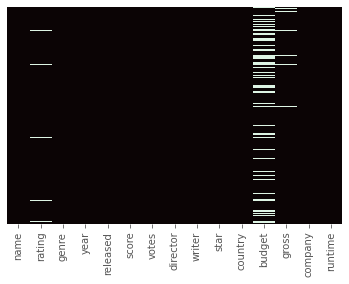

In [6]:
# Check for missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [7]:
# Predict Budget Values
# Drop other values
df.dropna(subset=['rating'],axis=0, inplace=True)

<AxesSubplot:>

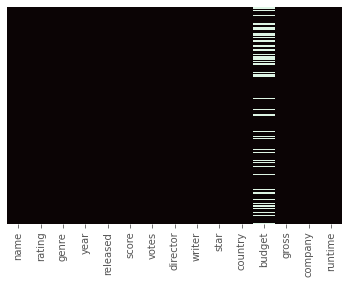

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [9]:
print('Missing Count')
df.isnull().sum()

Missing Count


name           0
rating         0
genre          0
year           0
released       2
score          1
votes          1
director       0
writer         3
star           0
country        2
budget      2114
gross        166
company       12
runtime        3
dtype: int64

In [10]:
print('Percent missing')
(df.isnull().sum()/len(df))* 100

Percent missing


name         0.000000
rating       0.000000
genre        0.000000
year         0.000000
released     0.026347
score        0.013173
votes        0.013173
director     0.000000
writer       0.039520
star         0.000000
country      0.026347
budget      27.848768
gross        2.186800
company      0.158082
runtime      0.039520
dtype: float64

In [11]:
# Get Trues and Falses
df['budget'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7655     True
7656     True
7658    False
7659     True
7661    False
Name: budget, Length: 7591, dtype: bool

In [12]:
# Get Trues and Falses
df['budget'].notnull()

0        True
1        True
2        True
3        True
4        True
        ...  
7655    False
7656    False
7658     True
7659    False
7661     True
Name: budget, Length: 7591, dtype: bool

In [13]:
# a DF with only nulls from budget
budget_null = df[df['budget'].isnull()]

In [14]:
# a DF with only values from budget
budget_notnull = df[df['budget'].notnull()]

In [15]:
# Drop other columns that have null values
budget_notnull= budget_notnull.dropna()

In [16]:
genre_notnull = list(budget_notnull[['genre']].value_counts().keys())

In [17]:
genre_null = list(budget_null[['genre']].value_counts().keys())

In [18]:
drop_genre = []
for genre in genre_null:
    if genre not in genre_notnull:
        drop_genre.append(genre)
drop_genre

[('Music',), ('Musical',), ('Sport',)]

In [19]:
notnull_rating =list(budget_notnull['rating'].value_counts().keys())

In [20]:
null_rating = list(budget_null['rating'].value_counts().keys())

In [21]:
drop_rating = []
for rating in null_rating:
    if rating not in notnull_rating:
        drop_rating.append(rating)
drop_rating
    

['TV-PG', 'TV-14']

In [22]:
genre_remove = ['Music', 'Musical', 'Sport']
rating_remove = ['TV-PG', 'TV-14', 'Approved']
budget_null = budget_null[budget_null['genre'].isin(genre_remove) == False]
budget_null = budget_null[budget_null['rating'].isin(rating_remove) == False]
budget_notnull = budget_notnull[budget_notnull['rating'].isin(rating_remove) == False]
budget_null.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [23]:
notnull_rating =list(budget_notnull['rating'].value_counts().keys())
null_rating = list(budget_null['rating'].value_counts().keys())
drop_rating = []
for rating in notnull_rating:
    if rating not in null_rating:
        drop_rating.append(rating)
drop_rating
    

[]

In [24]:
genre_notnull = list(budget_notnull[['genre']].value_counts().keys())
genre_null = list(budget_null[['genre']].value_counts().keys())
drop_genre = []
for genre in genre_notnull:
    if genre not in genre_null:
        drop_genre.append(genre)
drop_genre

[]

<AxesSubplot:>

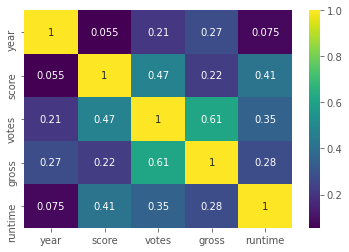

In [25]:
# Show correlation bewtween features
sns.heatmap(budget_notnull.drop('budget', axis=1).corr(), cmap='viridis', annot=True)

In [26]:
budget_notnull.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [27]:
budget_notnull.columns
# ['name', 'year', 'released', 'country']

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [28]:
budget_drop = budget_notnull.drop(['name', 'year', 'released', 'country'], axis=1)

In [29]:
for col in ['rating','genre','director', 'writer', 'star', 'company']:
    print(col, budget_drop[col].nunique())

rating 9
genre 15
director 2063
writer 3204
star 1845
company 1475


In [30]:
budget_drop = budget_drop.drop(['director','writer', 'star', 'company'], axis=1)

In [31]:
budget_drop.head()

,rating,genre,score,votes,budget,gross,runtime
0,R,Drama,8.4,927000.0,19000000.0,46998772.0,146.0
1,R,Adventure,5.8,65000.0,4500000.0,58853106.0,104.0
2,PG,Action,8.7,1200000.0,18000000.0,538375067.0,124.0
3,PG,Comedy,7.7,221000.0,3500000.0,83453539.0,88.0
4,R,Comedy,7.3,108000.0,6000000.0,39846344.0,98.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = budget_drop.drop('budget', axis=1)
y = budget_drop['budget']

In [34]:
X.head()

,rating,genre,score,votes,gross,runtime
0,R,Drama,8.4,927000.0,46998772.0,146.0
1,R,Adventure,5.8,65000.0,58853106.0,104.0
2,PG,Action,8.7,1200000.0,538375067.0,124.0
3,PG,Comedy,7.7,221000.0,83453539.0,88.0
4,R,Comedy,7.3,108000.0,39846344.0,98.0


In [35]:
X = pd.get_dummies(data=X, columns=['rating','genre'], drop_first=True)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 0 to 7652
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             5420 non-null   float64
 1   votes             5420 non-null   float64
 2   gross             5420 non-null   float64
 3   runtime           5420 non-null   float64
 4   rating_NC-17      5420 non-null   uint8  
 5   rating_Not Rated  5420 non-null   uint8  
 6   rating_PG         5420 non-null   uint8  
 7   rating_PG-13      5420 non-null   uint8  
 8   rating_R          5420 non-null   uint8  
 9   rating_TV-MA      5420 non-null   uint8  
 10  rating_Unrated    5420 non-null   uint8  
 11  rating_X          5420 non-null   uint8  
 12  genre_Adventure   5420 non-null   uint8  
 13  genre_Animation   5420 non-null   uint8  
 14  genre_Biography   5420 non-null   uint8  
 15  genre_Comedy      5420 non-null   uint8  
 16  genre_Crime       5420 non-null   uint8  


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr_model = LinearRegression()

In [40]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [41]:
predictions = lr_model.predict(X_test)

In [42]:
from sklearn import metrics

In [43]:
print(f'MAE {metrics.mean_absolute_error(y_test, predictions):,.2F}')
print(f'MSE {metrics.mean_squared_error(y_test, predictions):,.2F}')
print(f'RMSE {np.sqrt(metrics.mean_squared_error(y_test, predictions)):,.2F}')
print(f'MAPE {metrics.mean_absolute_percentage_error(y_test, predictions):,.2F} %')

MAE 16,509,181.90
MSE 628,959,096,758,799.25
RMSE 25,079,056.94
MAPE 2.05 %


# Use non null buget data to create a model and impute into all the null budget data!

In [44]:
budget_null.isnull().sum()

name           0
rating         0
genre          0
year           0
released       2
score          0
votes          0
director       0
writer         2
star           0
country        2
budget      2105
gross        112
company       10
runtime        2
dtype: int64

In [45]:
budget_null.dropna(subset=['released', 'writer','country','gross','company', 'runtime'], axis=0, inplace=True)

In [46]:
budget_null.reset_index(inplace=True)
budget_null.drop('index', axis=1, inplace=True)

In [47]:
budget_null.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
1,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
2,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
3,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
4,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [48]:
budget_null.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1984
gross          0
company        0
runtime        0
dtype: int64

In [49]:
budget_null_temp = budget_null.drop(['name', 'year', 'released', 'country', 'director','writer', 'star', 'company', 'budget'], axis=1)

In [50]:
budget_null_temp.head()

,rating,genre,score,votes,gross,runtime
0,R,Drama,6.6,21000.0,21202829.0,134.0
1,R,Comedy,6.8,26000.0,101300000.0,111.0
2,PG,Drama,6.4,14000.0,46918287.0,132.0
3,R,Horror,6.9,33000.0,19853892.0,102.0
4,R,Comedy,6.5,5100.0,34326249.0,96.0


In [51]:
budget_null_temp = pd.get_dummies(data=budget_null_temp, columns=['rating','genre'], drop_first=True)
budget_null_temp.head()

,score,votes,gross,runtime,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,...,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_Western
0,6.6,21000.0,21202829.0,134.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,6.8,26000.0,101300000.0,111.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6.4,14000.0,46918287.0,132.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6.9,33000.0,19853892.0,102.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,6.5,5100.0,34326249.0,96.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
lr_model.predict(budget_null_temp)

array([24281073.05389323, 24384822.76231776, 32418206.40196424, ...,
       15023717.29135288, 38005519.20167145,  5692389.81919129])

In [53]:
budget_null['budget']=lr_model.predict(budget_null_temp)

In [54]:
df = pd.concat([budget_notnull, budget_null], ignore_index=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7404 entries, 0 to 7403
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7404 non-null   object 
 1   rating    7404 non-null   object 
 2   genre     7404 non-null   object 
 3   year      7404 non-null   int64  
 4   released  7404 non-null   object 
 5   score     7404 non-null   float64
 6   votes     7404 non-null   float64
 7   director  7404 non-null   object 
 8   writer    7404 non-null   object 
 9   star      7404 non-null   object 
 10  country   7404 non-null   object 
 11  budget    7404 non-null   float64
 12  gross     7404 non-null   float64
 13  company   7404 non-null   object 
 14  runtime   7404 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 867.8+ KB


In [56]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [57]:
df.to_csv('../../_data/_processed/' + 'BudgetImputed.csv', index=False)